# regression intro plot

In [547]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.figure()
plt.show()
plt.close()


<Figure size 432x288 with 0 Axes>

In [548]:
# plt.rcParams.update({"font.size": 16})
# plt.rcParams.update({'font.size':10})
plt.rcParams.update({'font.size':20})

In [549]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [550]:
import numpy as np

In [551]:
x = [1, 2, 3]
y = [1.1, 2.5, 3.2]

In [552]:
p = np.polyfit(x, y, 1)

In [553]:
yhat = np.poly1d(p)

In [554]:
x_fine = np.linspace(1, 10, 100)

In [555]:
x_test = [8]
y_test = [6]

([], [])

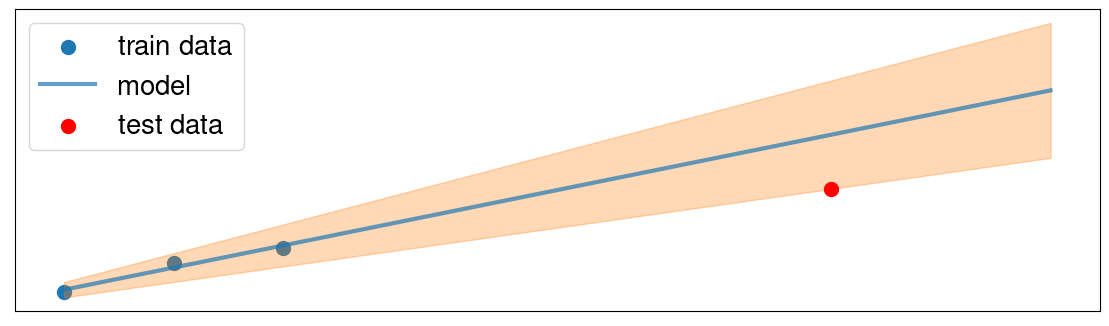

In [568]:
plt.figure(figsize=(14,4), dpi=100)
plt.scatter(x, y, label='train data', s=100)
plt.plot(x_fine, yhat(x_fine), alpha=0.7, label='model', lw=3)

# plt.fill_between(x_fine, y1=yhat(x_fine) - 0.1*yhat(x_fine), y2=yhat(x_fine) + 0.1*yhat(x_fine), alpha=0.3, color='C0')
plt.fill_between(x_fine, y1=yhat(x_fine) - 0.3*yhat(x_fine), y2=yhat(x_fine) + 0.3*yhat(x_fine), alpha=0.3, color='C1')

plt.scatter(x_test, y_test, label='test data', c='r', s=100)
plt.legend()
plt.xticks([])
plt.yticks([])

# NR plot

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.figure()
plt.show()
plt.close()


<Figure size 432x288 with 0 Axes>

In [65]:
# plt.rcParams.update({"font.size": 16})
# plt.rcParams.update({'font.size':10})
plt.rcParams.update({'font.size':20})

In [66]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [131]:
import lal

In [67]:
import pandas as pd
import os

In [68]:
import phenom

In [69]:
import lal

In [70]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [71]:
import pycbc.types
import pycbc.psd
import pycbc.filter
import pycbc.waveform
import pycbc.waveform.utils

In [72]:
import workflow_utils
import analysis_utils

In [73]:
import gpm_utils

# load data

In [74]:
# data_dict = workflow_utils.load_nr_data()
nr_data = workflow_utils.load_nr_data()

In [75]:
nr_data['times'][0]

-775.0

In [76]:
nr_data['times'][-1]

86.90000000019597

In [77]:
nr_data['df']

name      q     fring     fdamp  duration  t_final  \
0    q18a0a0c025_96_fine  18.00  0.063334  0.014140    1020.0    465.8   
1          q4a0_T_96_384   4.00  0.074330  0.014004    2202.1    229.5   
2    q8a0a0_T_96_504n512   8.00  0.067697  0.014104     953.1    430.4   
3     q8a0a0c05_T_80_420   8.00  0.067697  0.014104     941.9    259.8   
4      q10c25e_T_112_448  10.00  0.066184  0.014119    1157.7    121.6   
5          q4a0_T_80_320   4.00  0.074330  0.014004    2199.5    689.1   
6        q18a0a0c025_144  18.00  0.063334  0.014140    1028.3     88.8   
7   q8a0a0_T_112_588n768   8.00  0.067697  0.014104     957.9    207.8   
8        q18a0a0c025_120  18.00  0.063334  0.014140    1027.5    174.7   
9         q4a0_T_112_448   4.00  0.074330  0.014004    2202.5    151.8   
10     SXS_BBH_0107_Res3   5.00  0.071862  0.014048    7440.1    449.9   
11     SXS_BBH_0167_Res5   4.00  0.074330  0.014004    3115.7    404.1   
12     SXS_BBH_0107_Res5   5.00  0.071862  0.014048    7465.5    451.5   
13     SXS_BBH_0107_Res4   5.00  0.071862  0.014048    7457.2    449.8   
14     SXS_BBH_0167_Res3   4.00  0.074330  0.014004    2874.0    403.8   
15     SXS_BBH_0169_Res4   2.00  0.083149  0.013774    3458.2    406.7   
16     SXS_BBH_0169_Res5   2.00  0.083149  0.013774    3468.3    406.6   
17     SXS_BBH_0169_Res3   2.00  0.083149  0.013774    3088.2    406.7   
18     SXS_BBH_0180_Res3   1.00  0.088087  0.013596    9359.5    236.6   
19     SXS_BBH_0303_Res3  10.00  0.066184  0.014119    3397.6    498.9   
20     SXS_BBH_0180_Res2   1.00  0.088087  0.013596    9354.6    236.8   
21     SXS_BBH_0303_Res4  10.00  0.066184  0.014119    3433.2    499.1   
22     SXS_BBH_0180_Res4   1.00  0.088087  0.013596    9270.5    236.4   
23     SXS_BBH_0303_Res5  10.00  0.066184  0.014119    3461.4    499.7   
24     RIT-BBH-0416-n140   7.00  0.068739  0.014092    2362.1    363.1   
25     RIT-BBH-0084-n100   1.18  0.087761  0.013608    1602.1    396.2   
26     RIT-BBH-0152-n120   5.00  0.071862  0.014048    4000.5    557.5   
27    RIT-eBBH-1090-n100   1.00  0.088087  0.013596    1493.9    362.0   
28    RIT-eBBH-1133-n100   4.00  0.074330  0.014004    2143.1    712.8   
29    RIT-eBBH-1241-n100   1.33  0.087138  0.013633    1520.6    335.3   
30     RIT-BBH-0942-n120  15.00  0.064066  0.014135    1162.8    330.2   
31     RIT-BBH-0112-n100   1.00  0.088087  0.013596   16963.4    419.5   
32     RIT-BBH-0139-n140   2.41  0.080777  0.013847    2736.9    423.5   
33     RIT-BBH-0373-n140  15.00  0.064066  0.014135    2725.0    437.6   
34     RIT-BBH-0792-n120  32.00  0.061687  0.014149    1558.3    191.2   
35     RIT-BBH-0090-n100   6.00  0.070079  0.014075    1746.7    392.9   
36     RIT-BBH-1020-n144   1.82  0.084262  0.013737    1368.2    249.8   
37    RIT-eBBH-1200-n100   2.00  0.083149  0.013774    1637.8    318.1   
38     RIT-BBH-0978-n144  10.00  0.066184  0.014119    1963.0    393.4   
39     RIT-BBH-1025-n100  32.00  0.061687  0.014149    1474.0    240.2   
40                GT0379   2.20  0.081956  0.013812     936.3    616.9   
41                GT0378   2.05  0.082845  0.013784     915.7    637.3   
42                GT0757   2.25  0.081668  0.013820    1429.1    420.0   
43                GT0380   2.35  0.081105  0.013837     957.9    595.3   
44                GT0454   4.00  0.074330  0.014004    1855.1    495.1   
45                GT0898   1.20  0.087693  0.013611    1793.9    286.8   
46                GT0446   2.00  0.083149  0.013774    1378.6    470.3   
47                GT0453   3.00  0.077907  0.013924    1599.7    549.9   
48                GT0727   1.75  0.084699  0.013722    1330.0    418.7   
49                GT0477   1.50  0.086221  0.013667    1286.6    361.9   
50                GT0738   1.25  0.087500  0.013619    1252.6    395.9   
51                GT0577   5.00  0.071862  0.014048    1281.6    574.2   
52                GT0565   2.50  0.080296  0.013861    1484.2    465.0   
53                GT0604

# load model

In [78]:
# could also call the model GPM: Generative Phenomenological Model?
# PP = load_model_utils.PhenProb(model_dir="model_100123")

gpm = gpm_utils.GPM(
     # inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_26_02_23/components.cpkl',
     # inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_27_02_23/components.cpkl',
     # inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_28_02_23/components.cpkl',
    
    # last collocation = -100
    inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_03_03_23/components.cpkl',
    
    
     # merger_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_merger_26_02_23/components.cpkl',
     # merger_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_merger_27_02_23/components.cpkl',
    
     # last collocation = -100
     merger_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_merger_03_03_23/components.cpkl',
     ringdown_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_ringdown_26_02_23/components.cpkl',
     # ringdown_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_ringdown_27_02_23/components.cpkl',
    

     # inspiral_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_inspiral_26_02_23/components.cpkl',
     # merger_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_merger_26_02_23/components.cpkl',
    
    # last collocation = -100
     inspiral_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_inspiral_04_03_23/components.cpkl',
     merger_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_merger_04_03_23/components.cpkl',
     ringdown_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_ringdown_26_02_23/components.cpkl',
)

# main function

In [79]:
# compute the match between the mean GPM and NR
# compute the match between the samples GPM and NR
# compute the match between the mean GPM and the samples GPM

In [80]:
def compare_waveforms(hp1s, hc1s, hp2, hc2, low_frequency_cutoff=25, left_trim_M=200, end_time_M=70, high_frequency_cutoff=None):
    """
    hp1s, hc1s: list of pycbc.TimeSeries
    hp2, hc2: single instance of pycbc.TimeSeries
    
    hp2 and hc2 are left unchanged (in terms of time/phase shifts) but their lengths can change
    """
    hp1s_out = []
    hc1s_out = []
    
    for i in range(len(hp1s)):
        hp1_, hc1_, hp2_, hc2_ = analysis_utils.my_coalign_waveforms(hp1s[i], hc1s[i], hp2, hc2, Mtotal, left_trim_M=left_trim_M, end_time_M=end_time_M)
        hp1s_out.append(hp1_)
        hc1s_out.append(hc1_)
        
    # just take last one becase 2nd waveform remains fixed
    hp2_out = hp2_
    hc2_out = hc2_
    
    matches = [analysis_utils.compute_match(hp1s_out[i], hp2_out, low_frequency_cutoff, high_frequency_cutoff) for i in range(len(hp1s_out))]
    matches = np.array(matches)
    
    return matches, hp1s_out, hc1s_out, hp2_out, hc2_out

In [81]:
# get list of mass-ratios that have multiple simulations

In [82]:
q_duplicates = np.sort(nr_data['df'].query('has_dup == True')['q'].unique())

In [83]:
q_duplicates

array([ 1.,  2.,  4.,  5.,  6.,  8., 10., 15., 18., 32.])

In [84]:
nr_data['df'].query('q==2')

name    q     fring     fdamp  duration  t_final  \
15   SXS_BBH_0169_Res4  2.0  0.083149  0.013774    3458.2    406.7   
16   SXS_BBH_0169_Res5  2.0  0.083149  0.013774    3468.3    406.6   
17   SXS_BBH_0169_Res3  2.0  0.083149  0.013774    3088.2    406.7   
37  RIT-eBBH-1200-n100  2.0  0.083149  0.013774    1637.8    318.1   
46              GT0446  2.0  0.083149  0.013774    1378.6    470.3   

    start_freq_100Msun    set  has_dup                      tag  
15           19.330074  train     True   q2.0_SXS_BBH_0169_Res4  
16           19.329955  train     True   q2.0_SXS_BBH_0169_Res5  
17           19.330978  train     True   q2.0_SXS_BBH_0169_Res3  
37           19.432679  train     True  q2.0_RIT-eBBH-1200-n100  
46           19.420446  train     True              q2.0_GT0446

In [85]:
q = 15
idxs = nr_data['df'].query(f"q == {q}").index

display(nr_data['df'].query(f'q=={q}'))

# idx = 7
# idx=33
# idx=34
# q = nr_data['df']['q'].values[idx]
print(f"q = {q}")

times_ = nr_data['times']
nr_strain_0 = nr_data['strains'][idxs[0]]
nr_strain_other = nr_data['strains'][idxs[1:]]
delta_t = 1/4096.
Mtotal = 100
n_samples = 100
t_nr_start = -800

hp_gpm_bar, hc_gpm_bar = gpm.generate_pycbc_hp_hc(
    q=q,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=-1,
)


hp_gpm_samples, hc_gpm_samples = gpm.generate_pycbc_hp_hc(
    q=q,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=n_samples,
)

hp_nr, hc_nr = analysis_utils.get_nr_strain(
    q=q,
    strain=nr_strain_0,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    t_nr_start=t_nr_start,
)

hp_nr_others = []
hc_nr_others = []
for i in range(len(idxs[1:])):
    hp_nr_other_, hc_nr_other_ = analysis_utils.get_nr_strain(
        q=q,
        strain=nr_strain_other[i],
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        t_nr_start=t_nr_start,
    )
    hp_nr_others.append(hp_nr_other_)
    hc_nr_others.append(hc_nr_other_)

# compare the mean model prediction with one of the NR waveforms
matches_bar, hp1s_bar, hc1s_bar, hp2, hc2 = compare_waveforms(hp_gpm_bar, hc_gpm_bar, hp_nr, hc_nr)

# compare samples from the model with one of the NR waveforms
matches, hp1s, hc1s, _, _ = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_nr, hc_nr)

# compare samples from the model with the mean model prediction
matches_self, hp1s_self, hc1s_self, hp2_self, hc2_self = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_gpm_bar[0], hc_gpm_bar[0])

# compare the mean model prediction with all the NR waveforms:
matches_nr_other_gpm_bar, hp1s_nr_other_gpm_bar, hc1s_nr_other_gpm_bar, hp2_nr_other_gpm_bar, hc2_nr_other_gpm_bar = compare_waveforms(hp_nr_others, hc_nr_others, hp_gpm_bar[0], hc_gpm_bar[0])

# compare a reference NR with the other NR simulations at the same mass-ratio:
matches_nr_nr, hp1s_nr_nr, hc1s_nr_nr, hp2_nr_nr, hc2_nr_nr = compare_waveforms(hp_nr_others, hc_nr_others, hp_nr, hc_nr)

print(matches_bar[0])
print(min(matches))
print(np.median(matches))
print(max(matches))

times = hp1s[0].sample_times
times_M = phenom.StoM(times, Mtotal)

name     q     fring     fdamp  duration  t_final  \
30  RIT-BBH-0942-n120  15.0  0.064066  0.014135    1162.8    330.2   
33  RIT-BBH-0373-n140  15.0  0.064066  0.014135    2725.0    437.6   

    start_freq_100Msun   set  has_dup                      tag  
30           25.475422  test     True  q15.0_RIT-BBH-0942-n120  
33           25.544053  test     True  q15.0_RIT-BBH-0373-n140

q = 15
0.9995771951734402
0.9811115929730024
0.9985252680375709
0.9997299766823912


In [182]:
print(np.median(matches)-np.min(matches))

0.3921291503340037


In [183]:
print(np.min(matches))

0.3054516907309301


In [184]:
hp_nr_others

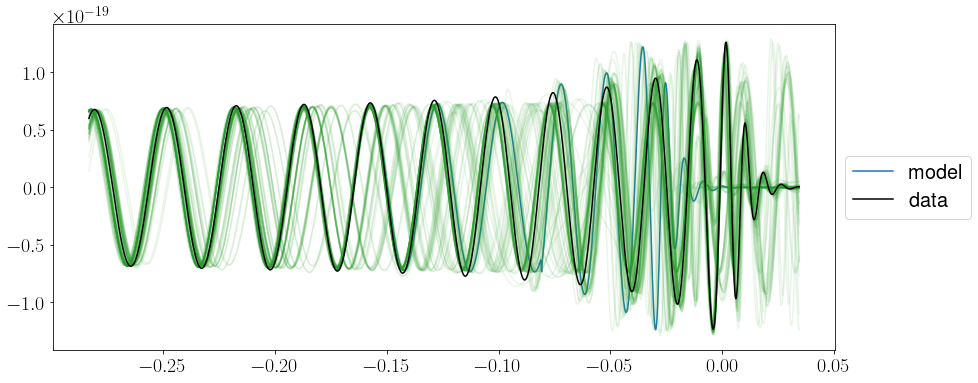

In [185]:
plt.figure(figsize=(14,6))


plt.plot(hp1s_bar[0].sample_times, hp1s_bar[0], label='model')

for hp1s_ in hp1s:
    plt.plot(hp1s_.sample_times, hp1s_, alpha=0.1, c='C2')

plt.plot(hp2.sample_times, hp2, label='data', c='k')

# for hp_o in hp_nr_others:
#     plt.plot(hp_o.sample_times, hp_o, c='k', ls='--')

    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [182]:
nr_amp = pycbc.waveform.amplitude_from_polarizations(hp2, hc2)
nr_phase = pycbc.waveform.phase_from_polarizations(hp2, hc2)
nr_freq = pycbc.waveform.frequency_from_polarizations(hp2, hc2)

In [183]:
gpm_amp = pycbc.waveform.amplitude_from_polarizations(hp1s_bar[0], hc1s_bar[0])
gpm_phase = pycbc.waveform.phase_from_polarizations(hp1s_bar[0], hc1s_bar[0])
gpm_freq = pycbc.waveform.frequency_from_polarizations(hp1s_bar[0], hc1s_bar[0])

In [184]:
gpm_amp_samples = [pycbc.waveform.amplitude_from_polarizations(hp_, hc_) for hp_, hc_ in zip(hp1s, hc1s)]
gpm_phase_samples = [pycbc.waveform.phase_from_polarizations(hp_, hc_) for hp_, hc_ in zip(hp1s, hc1s)]
gpm_freq_samples = [pycbc.waveform.frequency_from_polarizations(hp_, hc_) for hp_, hc_ in zip(hp1s, hc1s)]

In [185]:
nr_amp_others = [pycbc.waveform.amplitude_from_polarizations(hp_, hc_) for hp_, hc_ in zip(hp_nr_others, hc_nr_others)]
nr_phase_others = [pycbc.waveform.phase_from_polarizations(hp_, hc_) for hp_, hc_ in zip(hp_nr_others, hc_nr_others)]
nr_freq_others = [pycbc.waveform.frequency_from_polarizations(hp_, hc_) for hp_, hc_ in zip(hp_nr_others, hc_nr_others)]

(-0.05, 0.02)

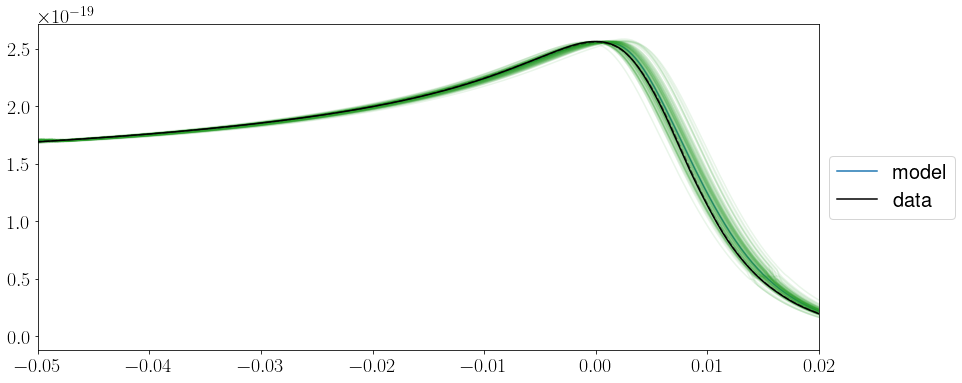

In [186]:
plt.figure(figsize=(14,6))


plt.plot(gpm_amp.sample_times, gpm_amp, label='model')

for gpm_amp_ in gpm_amp_samples:
    plt.plot(gpm_amp_.sample_times, gpm_amp_, alpha=0.1, c='C2')

plt.plot(nr_amp.sample_times, nr_amp, label='data', c='k')

for nr_amp_o in nr_amp_others:
    plt.plot(nr_amp_o.sample_times, nr_amp_o, alpha=0.5, c='k', ls='--')
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim(-0.05, 0.02)

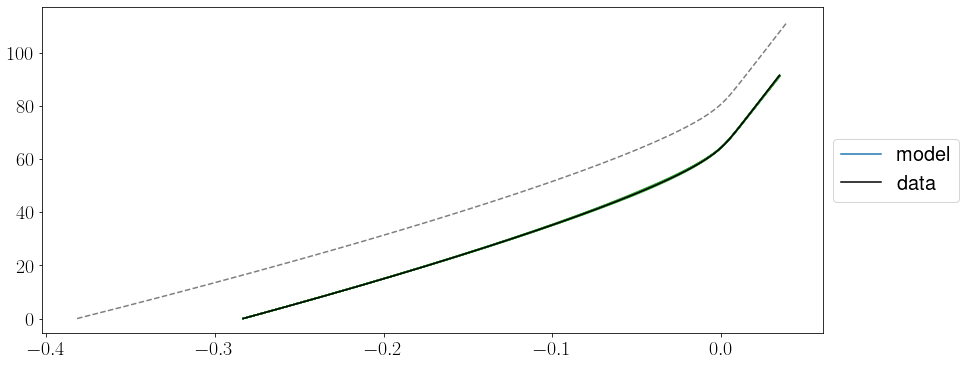

In [187]:
plt.figure(figsize=(14,6))


plt.plot(gpm_phase.sample_times, gpm_phase, label='model')

for gpm_phi_ in gpm_phase_samples:
    plt.plot(gpm_phi_.sample_times, gpm_phi_, alpha=0.1, c='C2')

plt.plot(nr_phase.sample_times, nr_phase, label='data', c='k')

for nr_phase_o in nr_phase_others:
    plt.plot(nr_phase_o.sample_times, nr_phase_o, alpha=0.5, c='k', ls='--')
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim(-0.05, 0.02)

(20.0, 148.9144799953502)

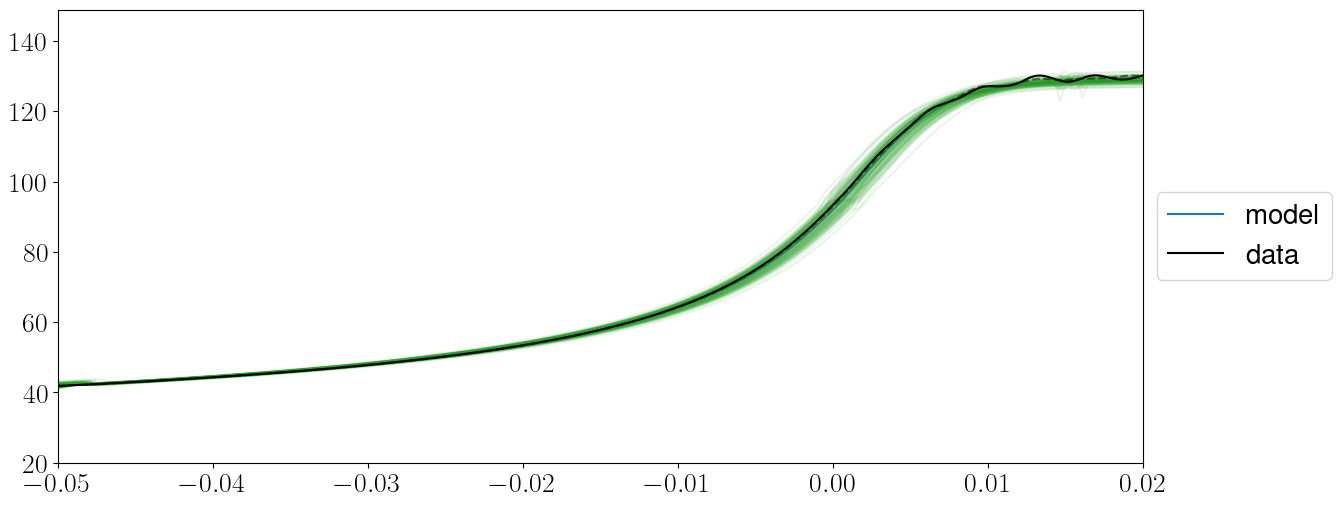

In [188]:
plt.figure(figsize=(14,6), dpi=100)


plt.plot(gpm_freq.sample_times, gpm_freq, label='model')

for gpm_freq_ in gpm_freq_samples:
    plt.plot(gpm_freq_.sample_times, gpm_freq_, alpha=0.1, c='C2')

plt.plot(nr_freq.sample_times, nr_freq, label='data', c='k')

for nr_freq_o in nr_freq_others:
    plt.plot(nr_freq_o.sample_times, nr_freq_o, alpha=0.5, c='k', ls='--')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim(-0.05, 0.02)
plt.ylim(20, 1.1*nr_freq.max())

In [229]:
hp_gpm_samples, hc_gpm_samples = gpm.generate_pycbc_hp_hc(
    q=q,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=n_samples,
)

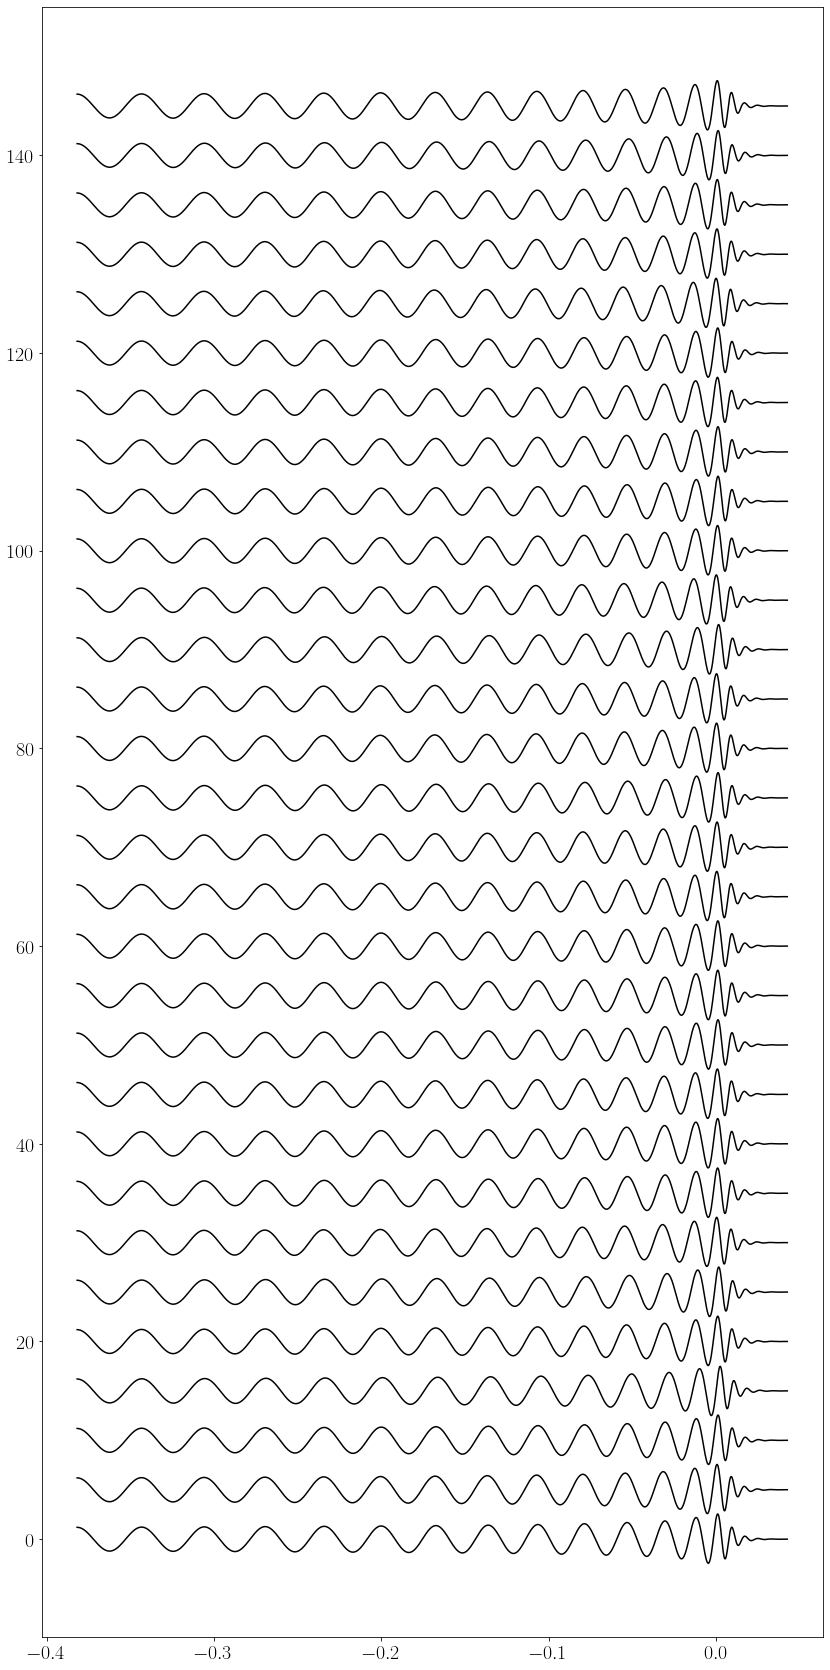

In [231]:
plt.figure(figsize=(14,30))

for i, h_ in enumerate(hp_gpm_samples[:30]):
    plt.plot(h_.sample_times, (1e19*h_) + i/0.2, alpha=1, c='k')
hp_gpm_samples[0]

# biased posterior example

In [536]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
plt.figure()
plt.show()
plt.close();
plt.rcParams.update({'font.size':16})

<Figure size 432x288 with 0 Axes>

In [537]:
x_ = np.linspace(-20, 20, 300)

In [538]:
true = {'loc':0, 'scale':1}
N_true = scipy.stats.norm(**true)

In [539]:
biased = {'loc':-4, 'scale':0.8}
N_biased = scipy.stats.norm(**biased)

In [540]:
better = {'loc':-4, 'scale':3}
N_better = scipy.stats.norm(**better)

In [542]:
def make_plot(to_include):
    plt.figure(dpi=200)
    if 'ideal' in to_include:
        plt.plot(x_, N_true.pdf(x_), c='k', lw=2, label='Ideal')
    if 'biased' in to_include:
        plt.plot(x_, N_biased.pdf(x_), lw=2, c='C0', label='Typical Model')
    if 'better' in to_include:
        plt.plot(x_, N_better.pdf(x_), lw=2, c='C1', label='Model with\ncalibrated\nuncertainty')


    # plt.axis('off');
    ax = plt.gca()
    # ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.set_xticklabels([]);
    ax.xaxis.set_tick_params(width=3)

    # change all spines
    ax.spines['bottom'].set_linewidth(2)

    # increase tick width
    # ax2.tick_params(width=4)
    plt.legend(loc='center left', bbox_to_anchor=(0.6, 0.8))
    

    plt.text(-1, -0.1, r'$\theta^{*}$')


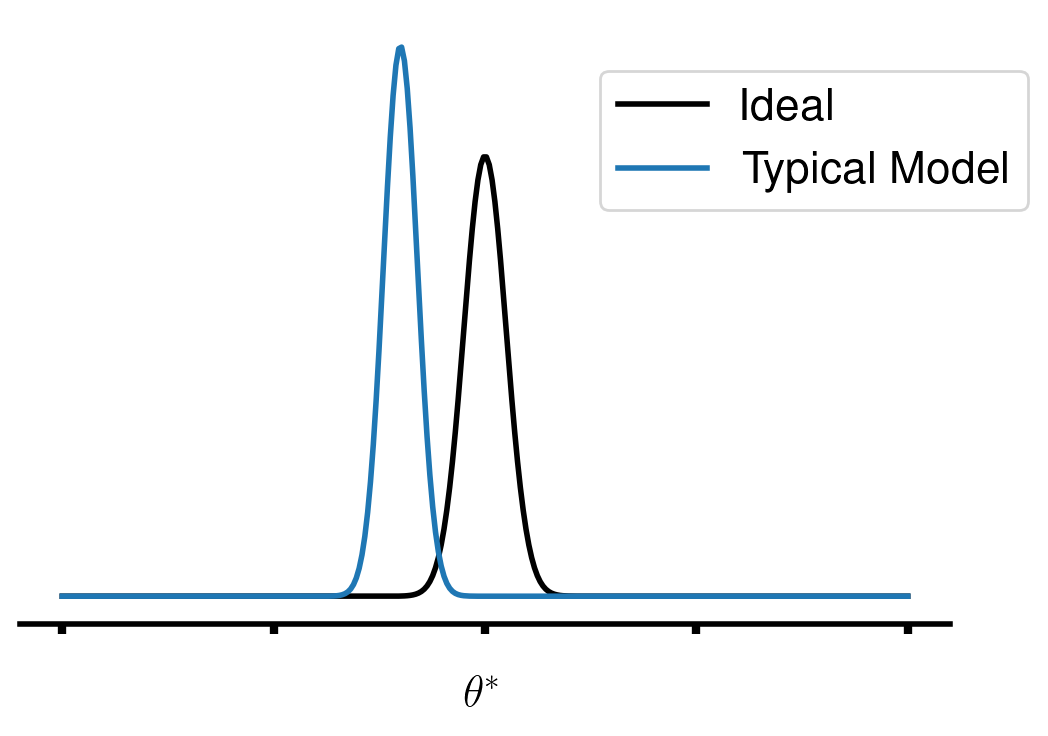

In [544]:
make_plot(to_include=['ideal', 'biased'])

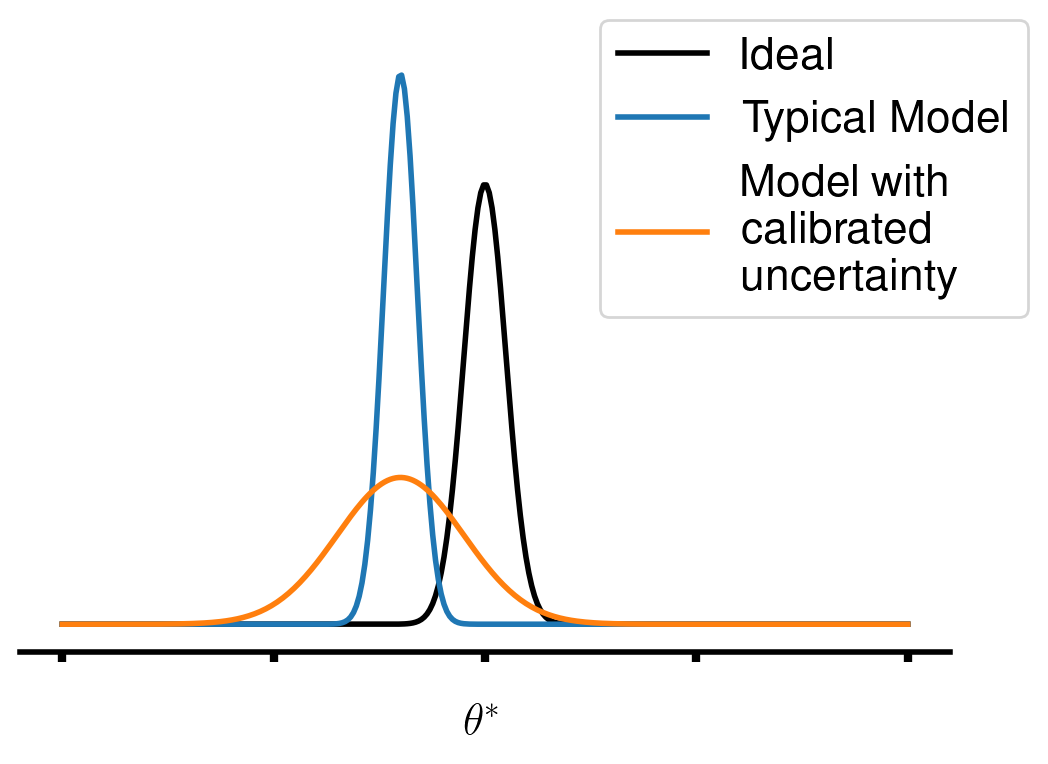

In [545]:
make_plot(to_include=['ideal', 'better', 'biased'])

# two gaussian

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
plt.figure()
plt.show()
plt.close();
plt.rcParams.update({'font.size':16})

<Figure size 432x288 with 0 Axes>

In [78]:
def make_plot_gaussian(to_include):
    one = {'loc':0, 'scale':1}
    N_one = scipy.stats.norm(**one)
    two = {'loc':2, 'scale':0.5}
    N_two = scipy.stats.norm(**two)
    x_ = np.linspace(-5, 5, 100)

    plt.figure(dpi=200)
    
    if 'one' in to_include:
        plt.plot(x_, N_one.pdf(x_), c='C0', lw=2, label='A')
    if 'two' in to_include:
        plt.plot(x_, N_two.pdf(x_), c='C1', lw=2, label='B')
    if 'both' in to_include:
        plt.plot(x_, N_one.pdf(x_) + N_two.pdf(x_)/10, c='k', lw=2, label='C', ls='--')
    # plt.axis('off');
    ax = plt.gca()
    # ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.set_xticklabels([]);
    ax.xaxis.set_tick_params(width=3)

    # change all spines
    ax.spines['bottom'].set_linewidth(2)

    # increase tick width
    # ax2.tick_params(width=4)
    # plt.legend(loc='center left', bbox_to_anchor=(0.6, 0.8))
    

    plt.text(-0.3, -0.13, r'$\theta$')

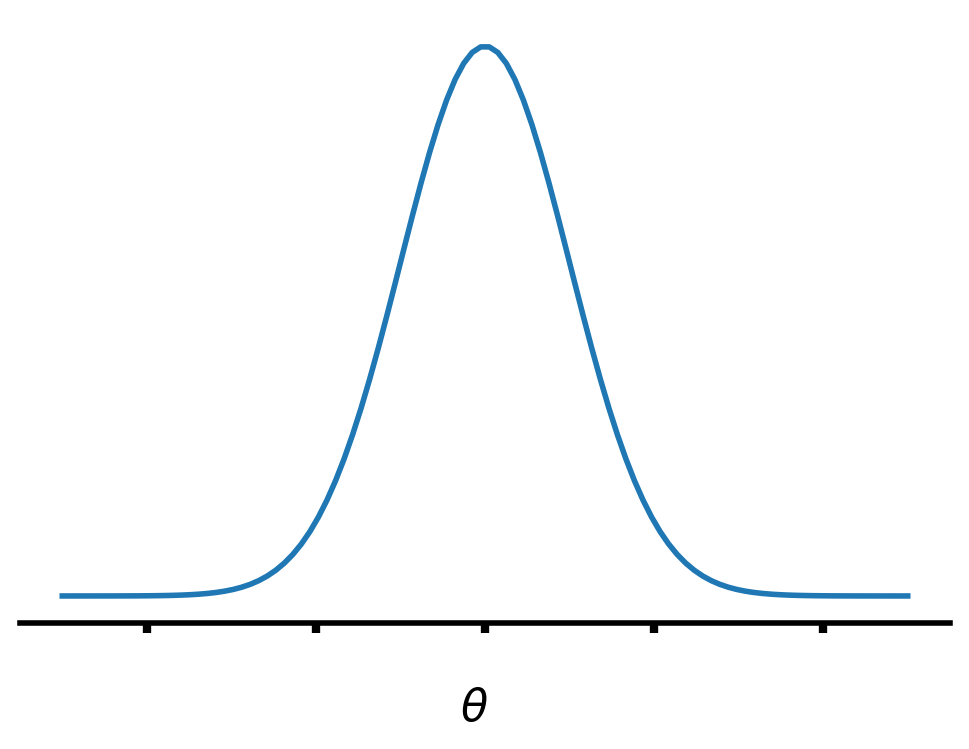

In [71]:
make_plot_gaussian(to_include=['one'])

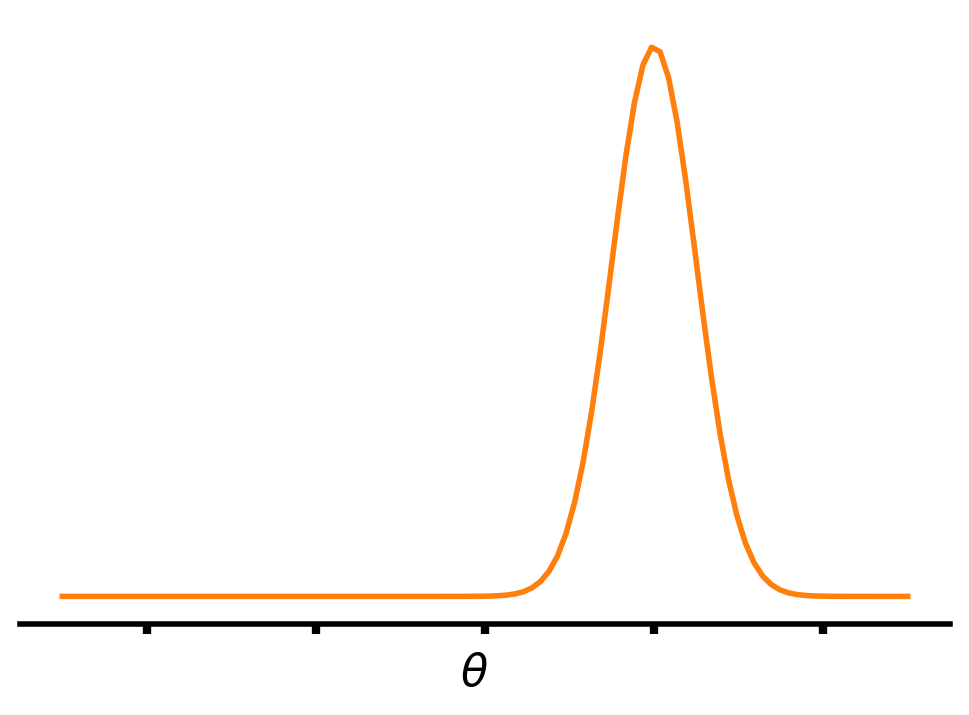

In [79]:
make_plot_gaussian(to_include=['two'])

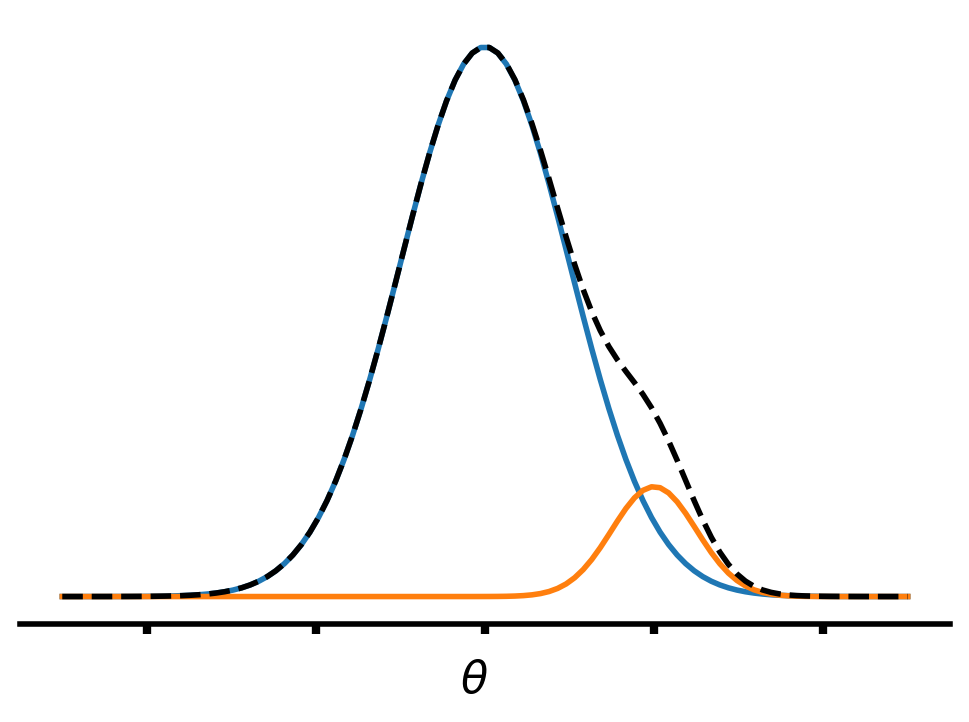

In [58]:
make_plot_gaussian(to_include=['one', 'two', 'both'])

# NR align

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.figure()
plt.show()
plt.close();
plt.rcParams.update({'font.size':16})

<Figure size 432x288 with 0 Axes>

In [89]:
import pycbc.waveform
import pycbc.types

In [90]:
!ls /Users/sebastian.khan/personal/data/non_spinning_catalogue_dec_2022

metadata.csv strains.npy  times.npy


In [91]:
metadata = pd.read_csv("/Users/sebastian.khan/personal/data/non_spinning_catalogue_dec_2022/metadata.csv")
strains = np.load("/Users/sebastian.khan/personal/data/non_spinning_catalogue_dec_2022/strains.npy")
times = np.load("/Users/sebastian.khan/personal/data/non_spinning_catalogue_dec_2022/times.npy")

In [92]:
delta_t = times[1] - times[0]
delta_t

0.10000000000002274

In [93]:
hps = np.real(strains)
hcs = np.imag(strains)

hps_ts = [pycbc.types.TimeSeries(hp_, delta_t, epoch=-800) for hp_ in hps]
hcs_ts = [pycbc.types.TimeSeries(hc_, delta_t, epoch=-800) for hc_ in hcs]

freqs = [pycbc.waveform.utils.frequency_from_polarizations(hps_ts_, hcs_ts_) for hps_ts_, hcs_ts_ in zip(hps_ts, hcs_ts)]

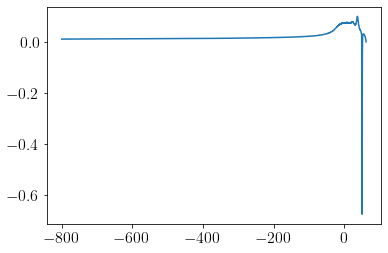

In [94]:
plt.plot(freqs[0].sample_times, freqs[1])

In [95]:
times.shape

(8620,)

In [96]:
strains.shape

(55, 8620)

In [97]:
metadata.shape

(55, 6)

In [257]:
metadata.query('q == 2')

name    q     fring     fdamp  duration  t_final
15   SXS_BBH_0169_Res4  2.0  0.083149  0.013774    3458.2    406.7
16   SXS_BBH_0169_Res5  2.0  0.083149  0.013774    3468.3    406.6
17   SXS_BBH_0169_Res3  2.0  0.083149  0.013774    3088.2    406.7
37  RIT-eBBH-1200-n100  2.0  0.083149  0.013774    1637.8    318.1
47              GT0446  2.0  0.083149  0.013774    1378.6    470.3

In [227]:
metadata.query('q == 4')

name    q    fring     fdamp  duration  t_final
1        q4a0_T_96_384  4.0  0.07433  0.014004    2202.1    229.5
5        q4a0_T_80_320  4.0  0.07433  0.014004    2199.5    689.1
9       q4a0_T_112_448  4.0  0.07433  0.014004    2202.5    151.8
11   SXS_BBH_0167_Res5  4.0  0.07433  0.014004    3115.7    404.1
14   SXS_BBH_0167_Res3  4.0  0.07433  0.014004    2874.0    403.8
28  RIT-eBBH-1133-n100  4.0  0.07433  0.014004    2143.1    712.8
45              GT0454  4.0  0.07433  0.014004    1855.1    495.1

In [228]:
metadata.query('q == 8')

name    q     fring     fdamp  duration  t_final
2   q8a0a0_T_96_504n512  8.0  0.067697  0.014104     953.1    430.4
3    q8a0a0c05_T_80_420  8.0  0.067697  0.014104     941.9    259.8
7  q8a0a0_T_112_588n768  8.0  0.067697  0.014104     957.9    207.8

In [302]:
# q4_strains = strains[metadata.query('q == 2').index]
q4_strains = strains[metadata.query('q == 4').index]
# q4_strains = strains[metadata.query('q == 8').index]
# q4_strains = [freqs[i] for i in metadata.query('q == 4').index]

In [303]:
# plt.figure(figsize=(20, 6), dpi=200)
# for i, s in enumerate(q4_strains):
#     plt.plot(s.sample_times, s, lw=1)
# plt.ylim(0, 0.2)

In [304]:
# plt.figure(figsize=(20, 6), dpi=200)
# for i, s in enumerate(q4_strains):
#     plt.plot(s.sample_times, s, lw=1)
# plt.ylim(0.02, 0.1)
# plt.xlim(-100, 50)

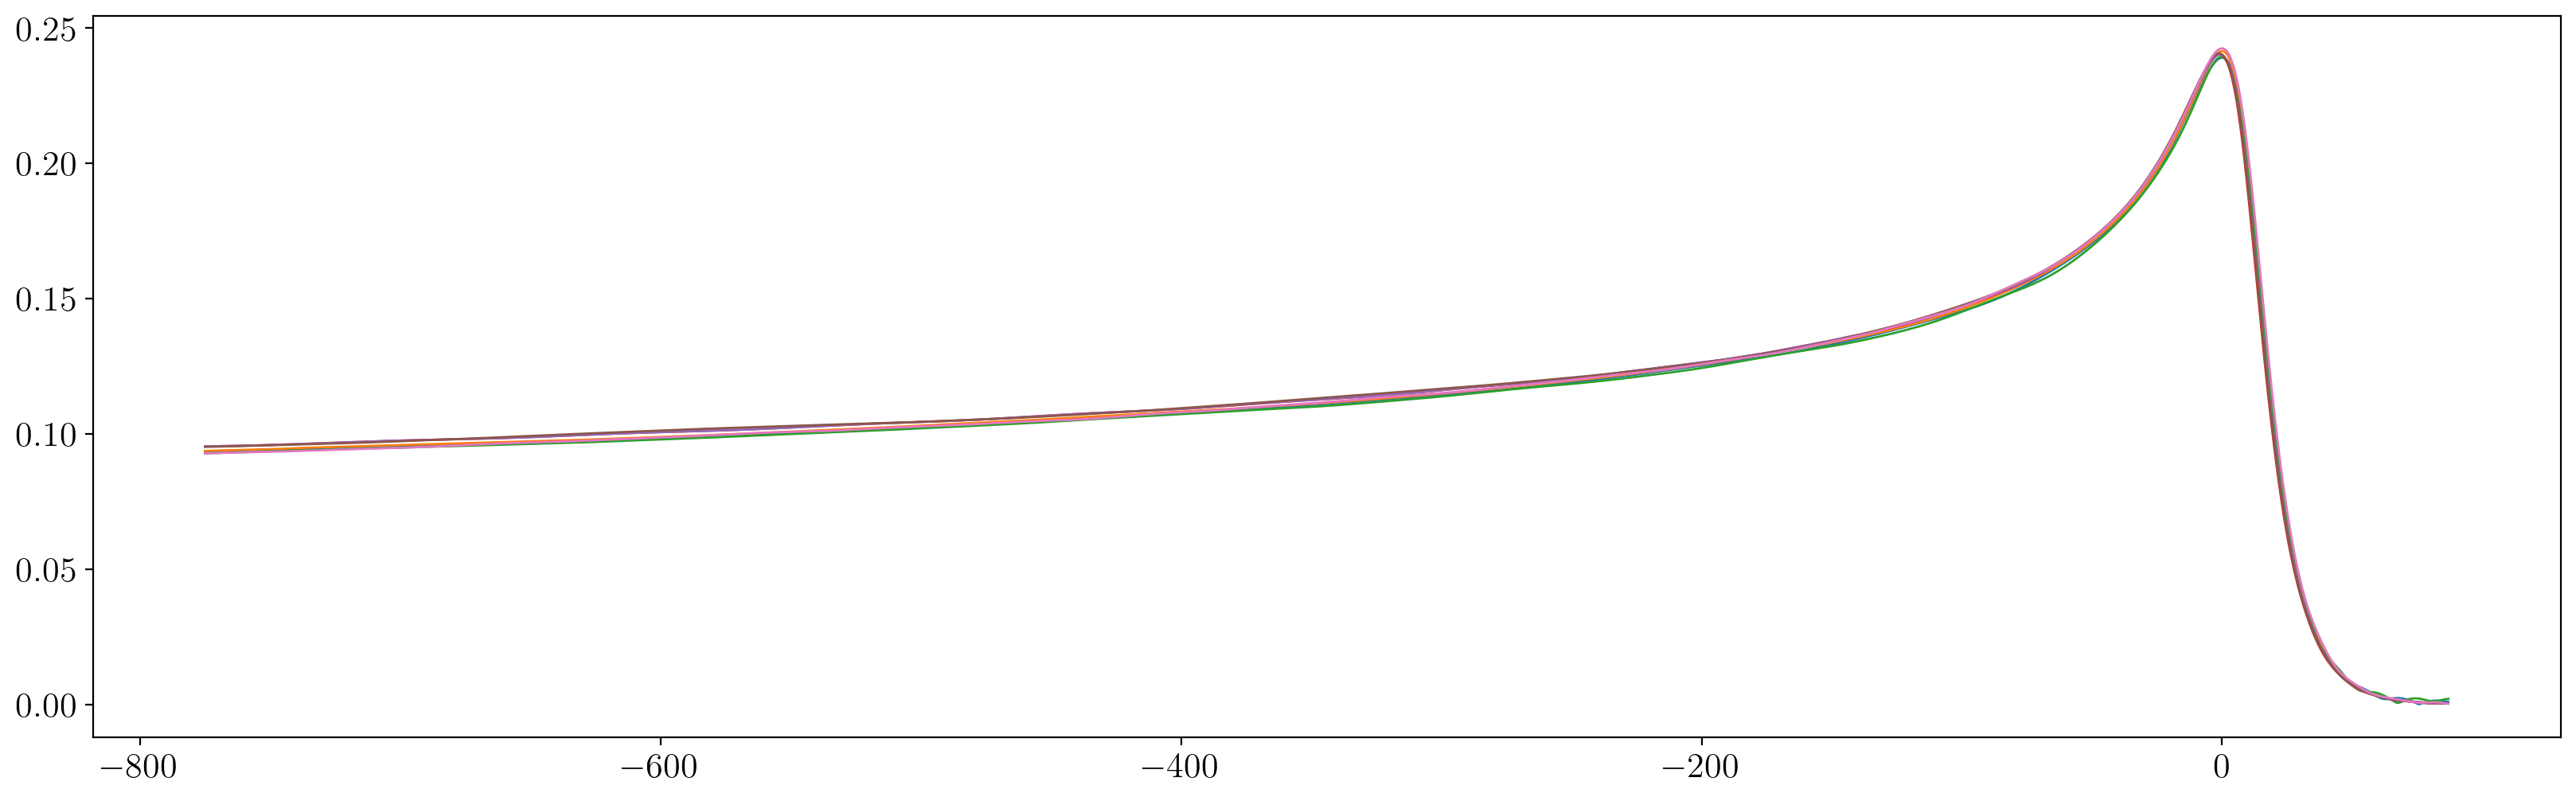

In [305]:
plt.figure(figsize=(20, 6), dpi=200)
for i, s in enumerate(q4_strains):
    plt.plot(times, np.abs(s), lw=1)
# plt.xlim(-100, 20)
# plt.ylim(0.1, 0.26)
# plt.yscale('log')

(-100.0, 20.0)

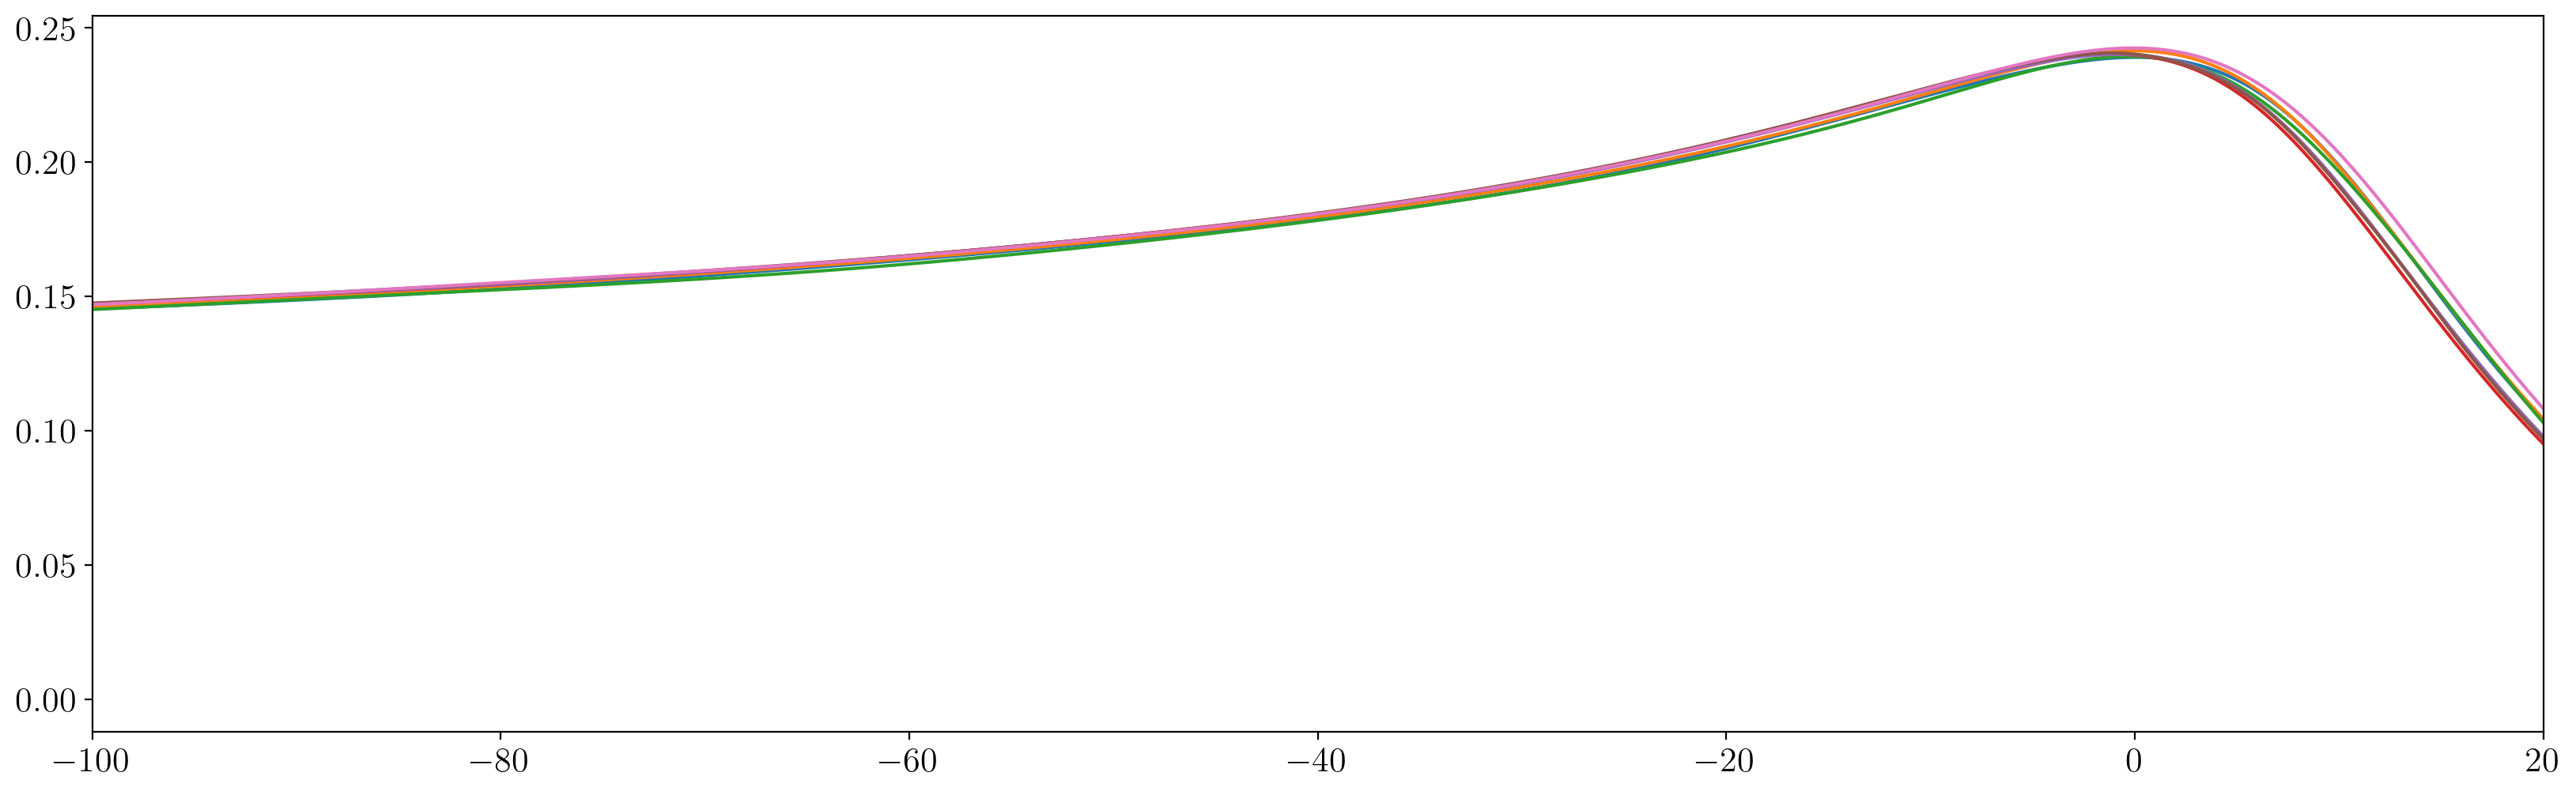

In [306]:
plt.figure(figsize=(20, 6), dpi=200)
for i, s in enumerate(q4_strains):
    plt.plot(times, np.abs(s))
plt.xlim(-100, 20)
# plt.ylim(0.1, 0.26)
# plt.yscale('log')

(0.1, 0.26)

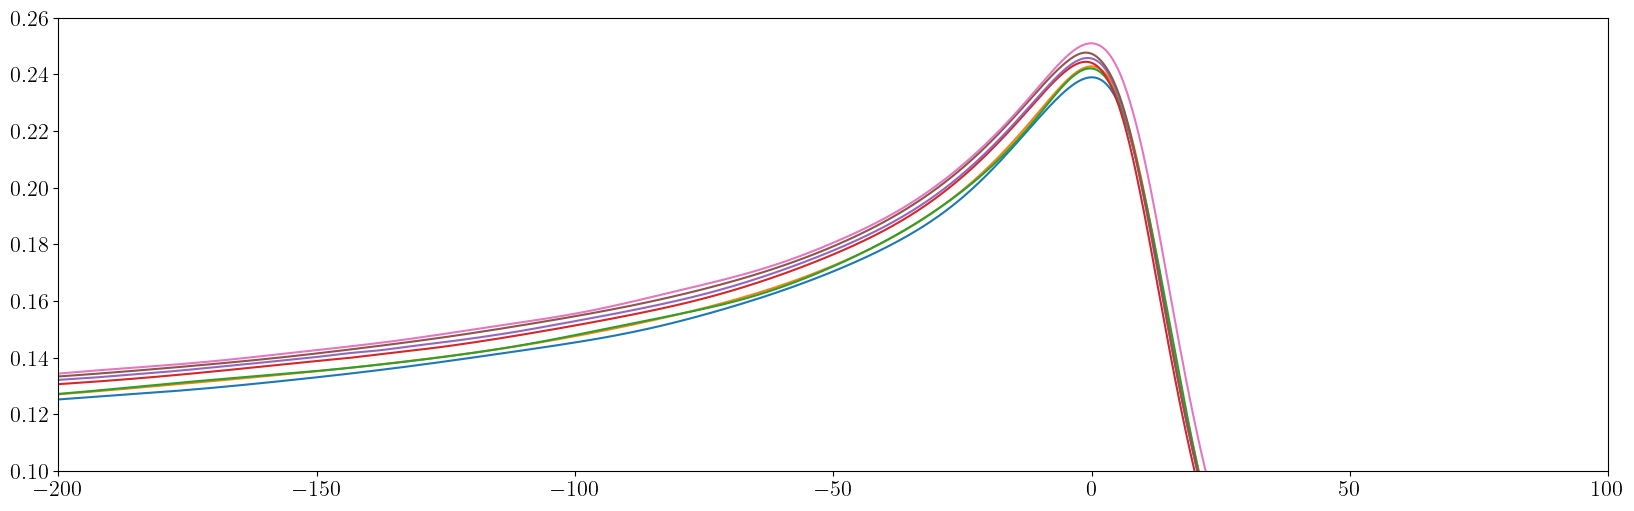

In [307]:
plt.figure(figsize=(20, 6), dpi=100)
for i, s in enumerate(q4_strains):
    plt.plot(times, np.abs(s) + i/700)
plt.xlim(-200, 100)
plt.ylim(0.1, 0.26)
# plt.yscale('log')

(0.16, 0.255)

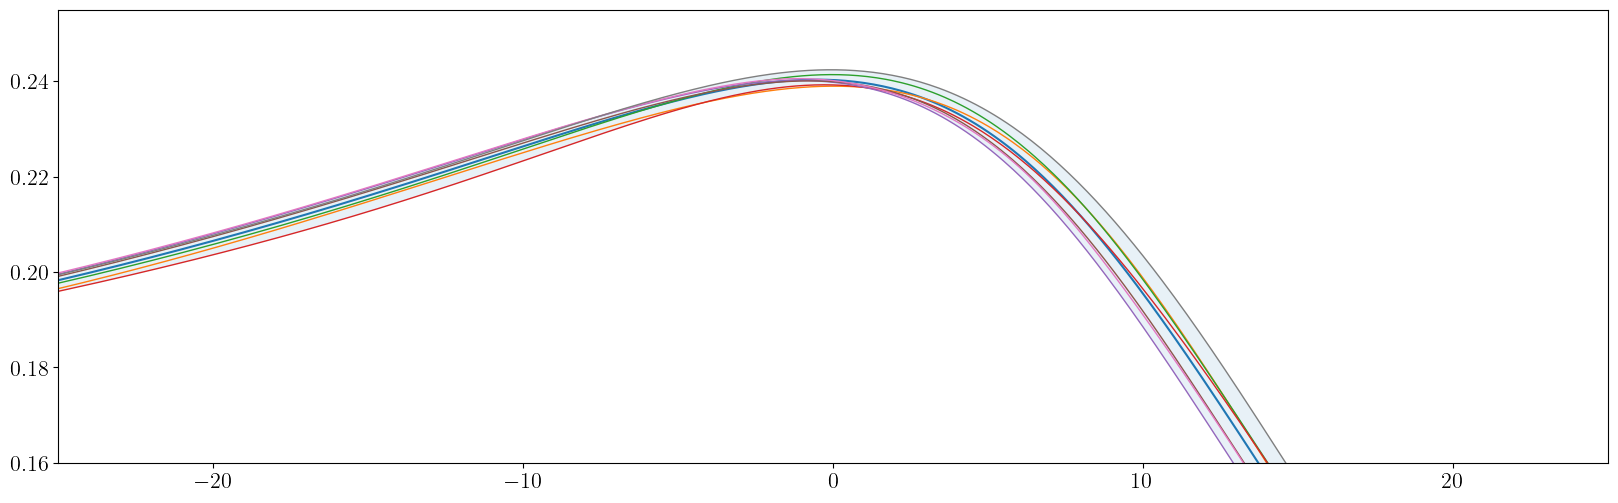

In [308]:
# percentage to inflate uncertainty by for visualisation
# exaguration = 0.05
exaguration = 0.0

m_ = np.mean(np.abs(q4_strains), axis=0)
min_ = np.min(np.abs(q4_strains), axis=0)
max_ = np.max(np.abs(q4_strains), axis=0)

min_ = (1+exaguration)*min_
max_ = (1-exaguration)*max_

plt.figure(figsize=(20, 6), dpi=100)
plt.plot(times, m_)
plt.fill_between(times, y1=min_, y2=max_, alpha=0.1)

for i, s in enumerate(q4_strains):
    plt.plot(times, np.abs(s) * (1 + np.random.uniform(-exaguration, exaguration)), lw=1)
plt.xlim(-25, 25)
plt.ylim(0.16, 0.255)
# plt.yscale('log')

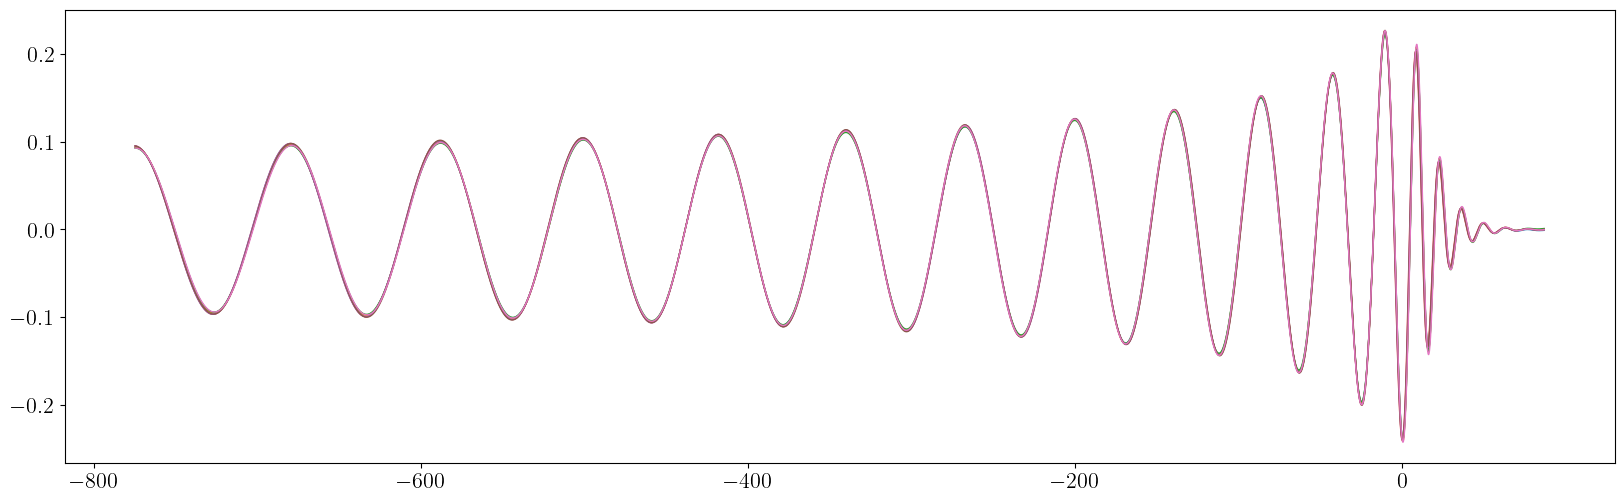

In [309]:
# percentage to inflate uncertainty by for visualisation
# exaguration = 0.05
exaguration = 0.0

m_ = np.mean(np.abs(q4_strains), axis=0)
min_ = np.min(np.abs(q4_strains), axis=0)
max_ = np.max(np.abs(q4_strains), axis=0)

min_ = (1+exaguration)*min_
max_ = (1-exaguration)*max_

plt.figure(figsize=(20, 6), dpi=100)
# plt.plot(times, m_)
# plt.fill_between(times, y1=min_, y2=max_, alpha=0.1)

for i, s in enumerate(q4_strains):
    plt.plot(times, np.real(s) * (1 + np.random.uniform(-exaguration, exaguration)), lw=1)
# plt.xlim(-25, 12)
# plt.ylim(0.19, 0.245)
# plt.yscale('log')

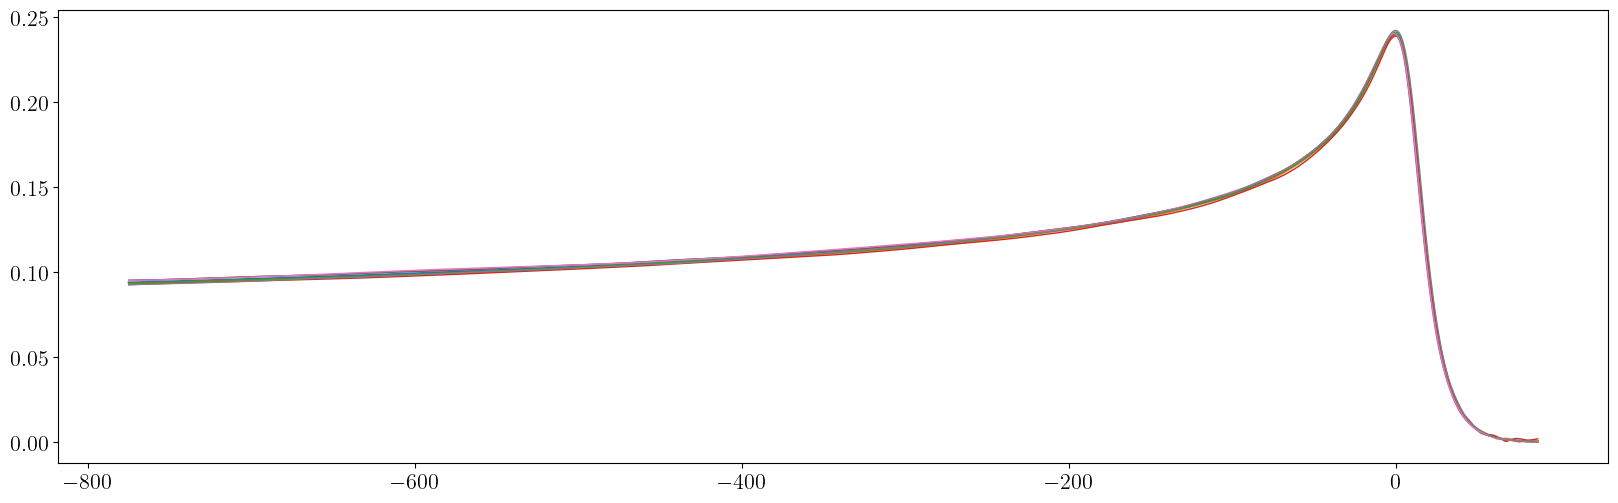

In [310]:
# percentage to inflate uncertainty by for visualisation
# exaguration = 0.05
exaguration = 0.0

m_ = np.mean(np.abs(q4_strains), axis=0)
min_ = np.min(np.abs(q4_strains), axis=0)
max_ = np.max(np.abs(q4_strains), axis=0)

min_ = (1+exaguration)*min_
max_ = (1-exaguration)*max_

plt.figure(figsize=(20, 6), dpi=100)
plt.plot(times, m_)
plt.fill_between(times, y1=min_, y2=max_, alpha=0.1)

for i, s in enumerate(q4_strains):
    plt.plot(times, np.abs(s) * (1 + np.random.uniform(-exaguration, exaguration)), lw=1)
# plt.xlim(-25, 12)
# plt.ylim(0.19, 0.245)
# plt.yscale('log')

(0.19, 0.245)

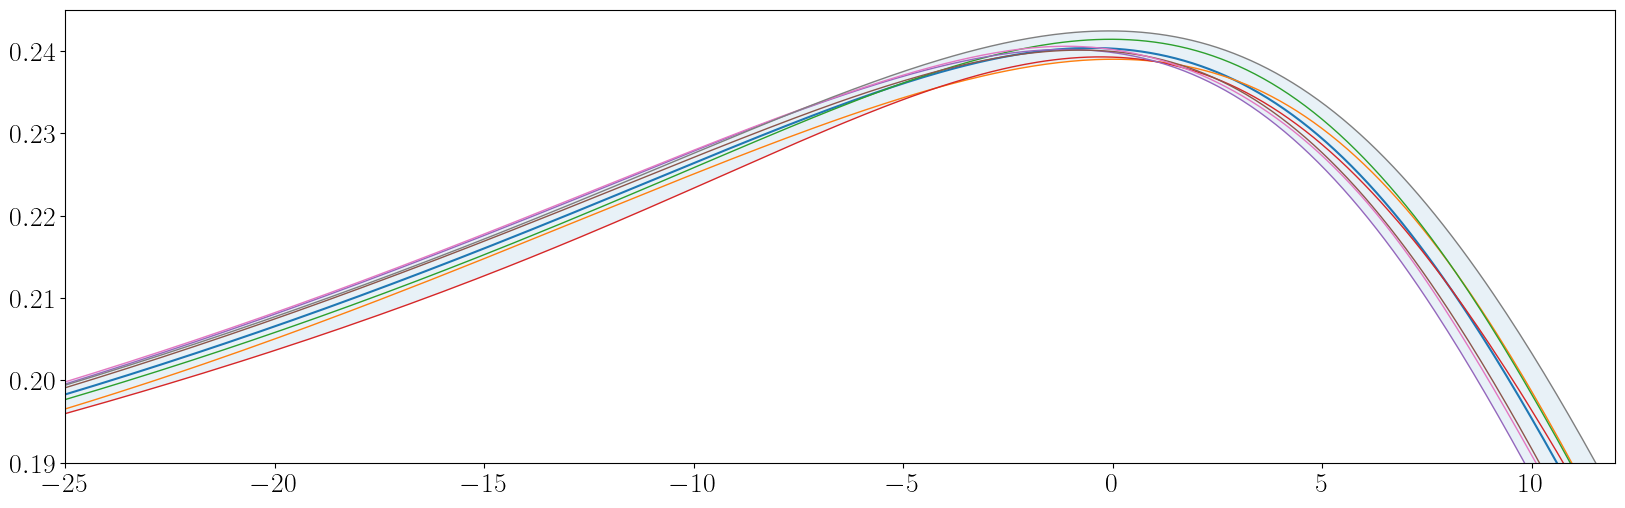

In [384]:
# percentage to inflate uncertainty by for visualisation
# exaguration = 0.05
exaguration = 0.0

m_ = np.mean(np.abs(q4_strains), axis=0)
min_ = np.min(np.abs(q4_strains), axis=0)
max_ = np.max(np.abs(q4_strains), axis=0)

min_ = (1+exaguration)*min_
max_ = (1-exaguration)*max_

plt.figure(figsize=(20, 6), dpi=100)
plt.plot(times, m_)
plt.fill_between(times, y1=min_, y2=max_, alpha=0.1)

for i, s in enumerate(q4_strains):
    plt.plot(times, np.abs(s) * (1 + np.random.uniform(-exaguration, exaguration)), lw=1)
    

#q4 
plt.xlim(-25, 12)
plt.ylim(0.19, 0.245)

#q8
# plt.xlim(-25, 12)
# plt.ylim(0.12, 0.15)

# plt.yscale('log')

In [ ]:
####
#
# start collocation
#
#### 

In [422]:

import copy
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

import sympy
x_sym, a_sym, om_rd = sympy.symbols('x_sym a_sym om_rd')
# https://stackoverflow.com/questions/67450349/how-to-show-a-sympy-equation-in-matplotlib
from sympy.printing import latex
# sympy.init_printing()

In [386]:
import collocation 

In [410]:
xs = times.copy()
ys = np.abs(q4_strains).copy()

mask = (xs > -100) & (xs < 10)
xs = xs[mask]
ys_all = ys[:, mask]

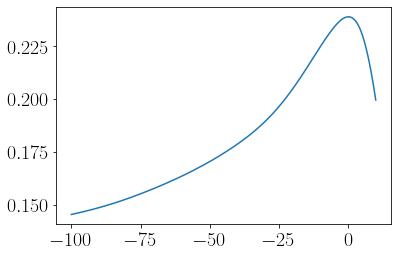

In [411]:
plt.plot(xs, ys_all[0])

In [476]:
ys = ys_all[1]

In [477]:
iy = IUS(xs, ys)

In [478]:
ang_fdamp = metadata.query('q == 4')['fdamp'].values[0]*2*np.pi
ang_fdamp

0.08798814203035654

In [489]:
collocation_points = {0:[-100, -50, -10, 0], 1:[0]}
rhs_true = {d:[iy.derivative(d)(v) for v in collocation_points[d]] for d in collocation_points.keys()}
# ansatz = sum([x_sym**p for p in range(4)])
# ansatz = base_ansatz.copy()
# sub_dict = {"a_sym":ang_fdamp}

ansatz = np.sum([sympy.asinh(ang_fdamp * x_sym)**power for power in range(5)])

In [490]:
ansatz

asinh(0.0879881420303565*x_sym)**4 + asinh(0.0879881420303565*x_sym)**3 + asinh(0.0879881420303565*x_sym)**2 + asinh(0.0879881420303565*x_sym) + 1

In [491]:
collocation_points

{0: [-100, -50, -10, 0], 1: [0]}

In [492]:
rhs_true

{0: [array(0.14612586),
  array(0.17102998),
  array(0.22581161),
  array(0.24140428)],
 1: [array(-2.2858549e-05)]}

In [493]:
cm = collocation.CollocationModel(collocation_points, rhs_true, ansatz)

In [494]:
cm.coeffs

array([ 0.24140428, -0.03316333, -0.01122685, -0.0013004 , -0.00025979])

In [495]:
rhs_stars = []
n_samples = 10
for n in range(n_samples):
    rhs_star = copy.deepcopy(rhs_true)
    # rhs_star[0][2] += np.random.normal(0, 0.0005)
    rhs_star[0][3] += np.random.normal(0, 0.001)
    rhs_stars.append(rhs_star)
    
yhats = []
for n in range(n_samples):
    cm_ = collocation.CollocationModel(collocation_points, rhs_stars[n], ansatz)
    yhat_ = cm_.predict(xs)
    yhats.append(yhat_)
yhats = np.array(yhats)

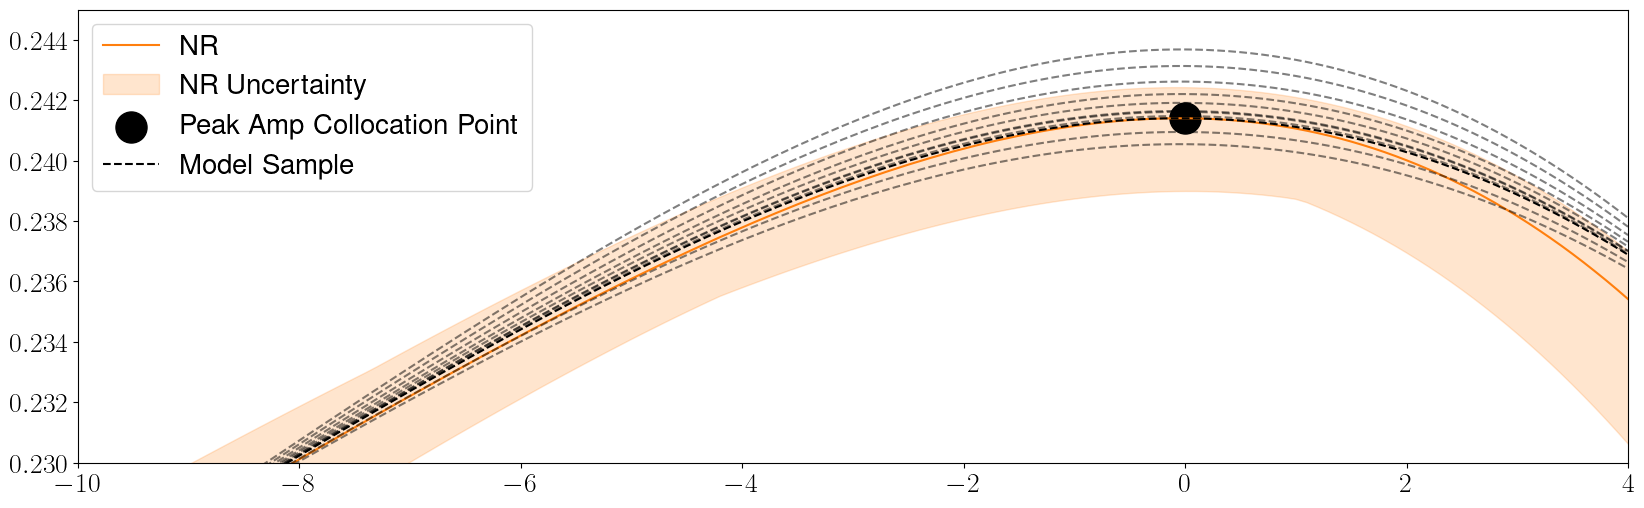

In [534]:
plt.figure(figsize=(20, 6), dpi=100)
plt.plot(xs, ys, label='NR', c='C1')
plt.fill_between(times, y1=min_, y2=max_, alpha=0.2, label='NR Uncertainty', color='C1')
    
plt.scatter(collocation_points[0][3], rhs_true[0][3], c='k', s=500, marker='o', label='Peak Amp Collocation Point')

plt.plot(xs, cm.predict(xs), c='k', ls='--', label='Model Sample')
for i in range(len(yhats)):
    plt.plot(xs, yhats[i], c='k', alpha=0.5, ls='--')

plt.xlim(-10, 4)
plt.ylim(0.23, 0.245)
plt.legend()

In [ ]:
####
#
# end collocation
#
#### 

In [312]:
delta_t

0.10000000000002274

In [313]:
times

array([-775. , -774.9, -774.8, ...,   86.7,   86.8,   86.9])

In [314]:
# q = 2
q = 4
# q = 8
hp_gpm_samples, hc_gpm_samples = gpm.generate_pycbc_hp_hc(
    q=q,
    times=times,
    M=Mtotal,
    delta_t=1/4096.,
    n_samples=n_samples,
)


In [315]:
amp_pre_factor = gpm_utils.td_amp_scale(Mtotal, 3.085677581491367e+22) * np.abs(lal.SpinWeightedSphericalHarmonic(0, 0, -2, 2, 2))

In [316]:
amp_pre_factor

3.0185596330671845e-18

In [317]:
amp_gpm_samples = [pycbc.waveform.utils.amplitude_from_polarizations(hp_, hc_)/amp_pre_factor for hp_, hc_ in zip(hp_gpm_samples, hc_gpm_samples)]

In [318]:
times_M = phenom.StoM(amp_gpm_samples[0].sample_times, Mtotal)

In [319]:
amp_gpm_samples_np = np.array([a_ for a_ in amp_gpm_samples])

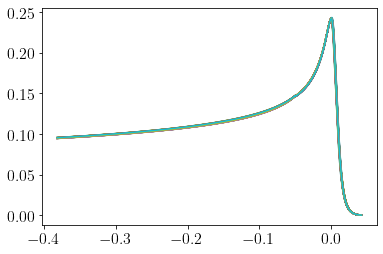

In [320]:
for amp_ in amp_gpm_samples:
    plt.plot(amp_.sample_times, amp_)

(0.19, 0.245)

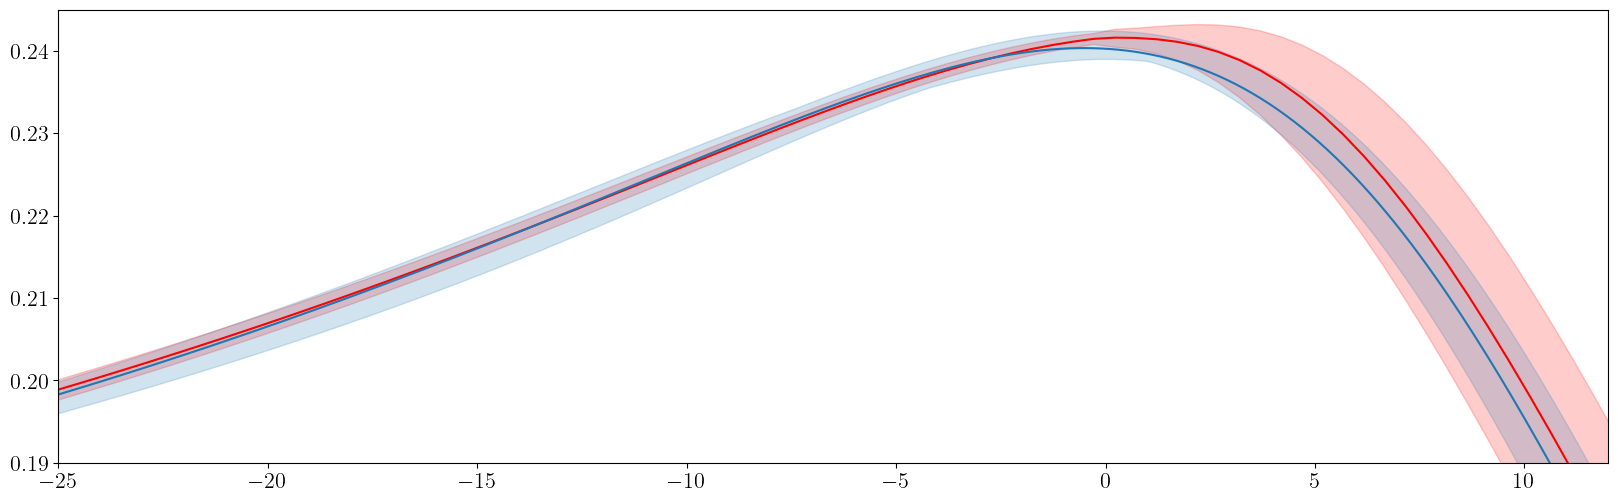

In [325]:
plt.figure(figsize=(20, 6), dpi=100)


amp_gpm_mean = np.mean(amp_gpm_samples_np, axis=0)
amp_gpm_min = np.min(amp_gpm_samples_np, axis=0)
amp_gpm_max = np.max(amp_gpm_samples_np, axis=0)

plt.plot(times_M, amp_gpm_mean, c='r')
plt.fill_between(times_M, y1=amp_gpm_min, y2=amp_gpm_max, alpha=0.2, color='r')

# for amp_ in amp_gpm_samples_np:
#     plt.plot(times_M, amp_, c='r', alpha=0.1)

plt.plot(times, m_, c='C0')
plt.fill_between(times, y1=min_, y2=max_, alpha=0.2, color='C0')
# for i, s in enumerate(q4_strains):
#     plt.plot(times, np.abs(s) * (1 + np.random.uniform(-exaguration, exaguration)), lw=1)
    

#q2
# plt.xlim(-25, 12)
# plt.ylim(0.28, 0.35)
    
#q4 
plt.xlim(-25, 12)
plt.ylim(0.19, 0.245)

#q8
# plt.xlim(-25, 12)
# plt.ylim(0.12, 0.15)


# plt.xlim(-400, 50)
# plt.ylim(0.1, 0.245)
# plt.legend()

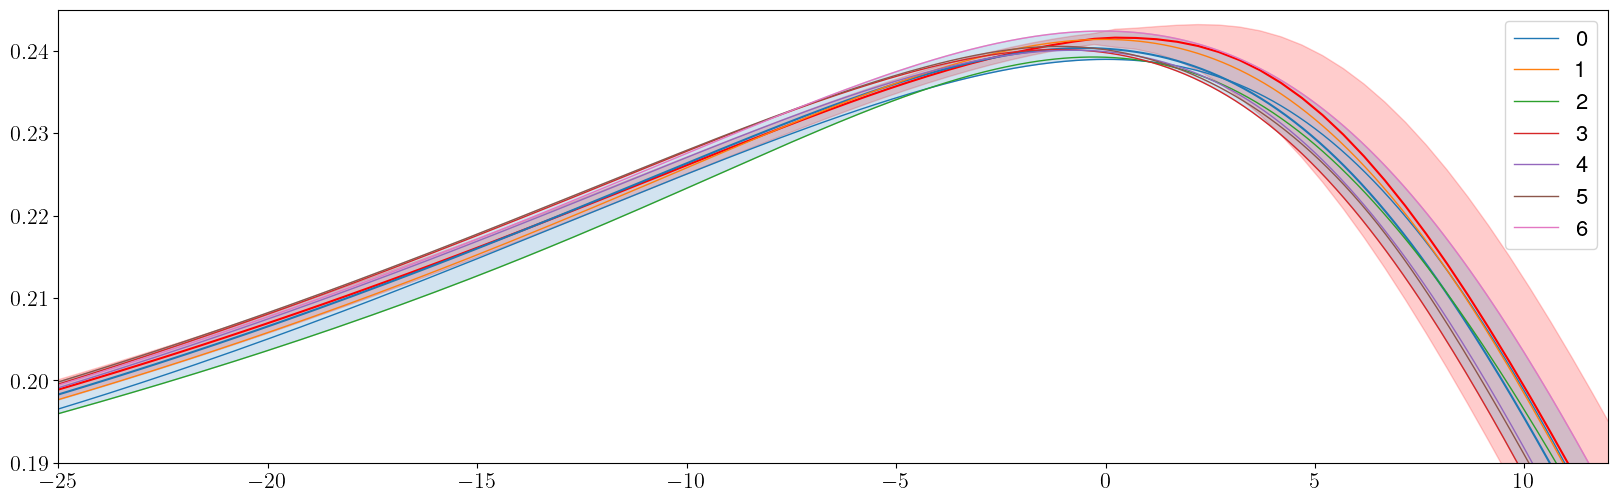

In [324]:
plt.figure(figsize=(20, 6), dpi=100)


amp_gpm_mean = np.mean(amp_gpm_samples_np, axis=0)
amp_gpm_min = np.min(amp_gpm_samples_np, axis=0)
amp_gpm_max = np.max(amp_gpm_samples_np, axis=0)

plt.plot(times_M, amp_gpm_mean, c='r')
plt.fill_between(times_M, y1=amp_gpm_min, y2=amp_gpm_max, alpha=0.2, color='r')

# for amp_ in amp_gpm_samples_np:
#     plt.plot(times_M, amp_, c='r', alpha=0.1)

plt.plot(times, m_, c='C0')
plt.fill_between(times, y1=min_, y2=max_, alpha=0.2, color='C0')
for i, s in enumerate(q4_strains):
    plt.plot(times, np.abs(s) * (1 + np.random.uniform(-exaguration, exaguration)), lw=1, label=i)
    

#q2
plt.xlim(-25, 12)
plt.ylim(0.28, 0.35)
    
#q4 
plt.xlim(-25, 12)
plt.ylim(0.19, 0.245)

#q8
# plt.xlim(-25, 12)
# plt.ylim(0.12, 0.15)


# plt.xlim(-400, 50)
# plt.ylim(0.1, 0.245)
plt.legend()